In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import sys
import os
import pandas as pd
%load_ext autoreload
%autoreload 2

sys.path.append('..')
from dataset.create_google_fonts_dataset import parse_gf_metadata
from dataset.utils import visualize_set_of_chars, render_character

In [2]:
from fontbakery.utils import get_FamilyProto_Message
google_fonts_path = '../dataset/fonts/ofl/'
message = get_FamilyProto_Message(google_fonts_path + 'londrinasolid/METADATA.pb')
message

name: "Londrina Solid"
designer: "Marcelo Magalh\303\243es"
license: "OFL"
category: "DISPLAY"
date_added: "2012-03-14"
fonts {
  name: "Londrina Solid"
  style: "normal"
  weight: 100
  filename: "LondrinaSolid-Thin.ttf"
  post_script_name: "LondrinaSolid-Thin"
  full_name: "Londrina Solid Thin"
  copyright: "Copyright 2011 The Londrina Solid Authors (https://github.com/marcelommp/Londrina-Typeface), with Reserved Font Name \"Londrina Solid\""
}
fonts {
  name: "Londrina Solid"
  style: "normal"
  weight: 300
  filename: "LondrinaSolid-Light.ttf"
  post_script_name: "LondrinaSolid-Light"
  full_name: "Londrina Solid Light"
  copyright: "Copyright 2011 The Londrina Solid Authors (https://github.com/marcelommp/Londrina-Typeface), with Reserved Font Name \"Londrina Solid\""
}
fonts {
  name: "Londrina Solid"
  style: "normal"
  weight: 400
  filename: "LondrinaSolid-Regular.ttf"
  post_script_name: "LondrinaSolid-Regular"
  full_name: "Londrina Solid Regular"
  copyright: "Copyright 2011

In [68]:
capital_alphabet = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
char_set = capital_alphabet
for char in 'OQMWIN':
    char_set = char_set.replace(char, '')
char_set

'ABCDEFGHJKLPRSTUVXYZ'

2


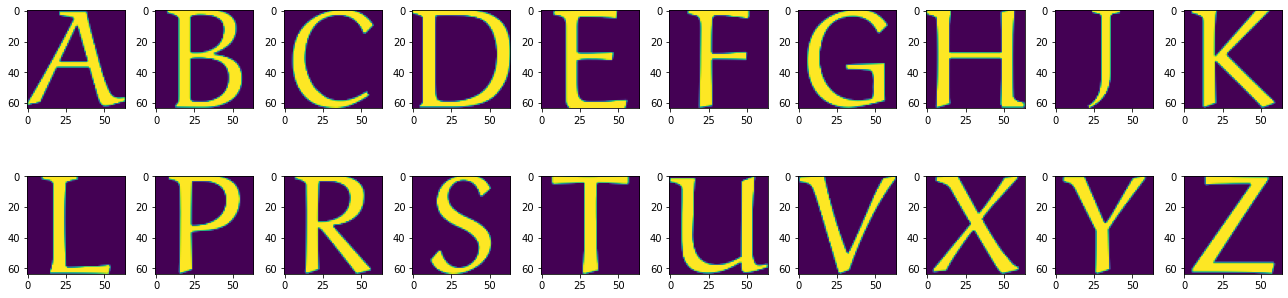

2


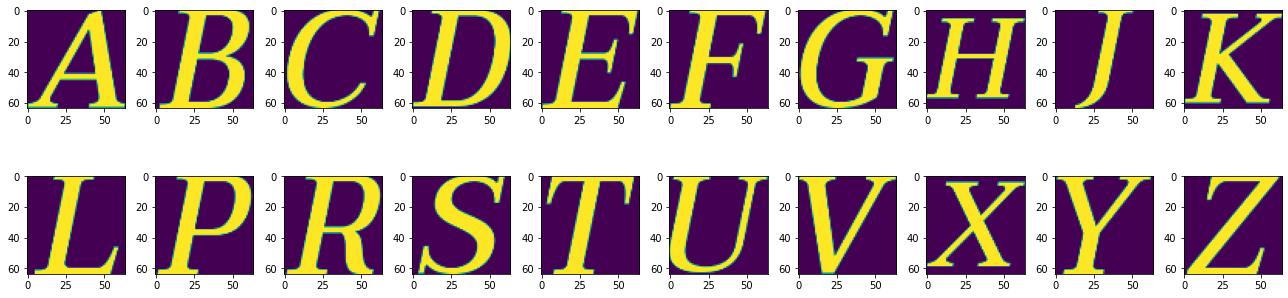

2


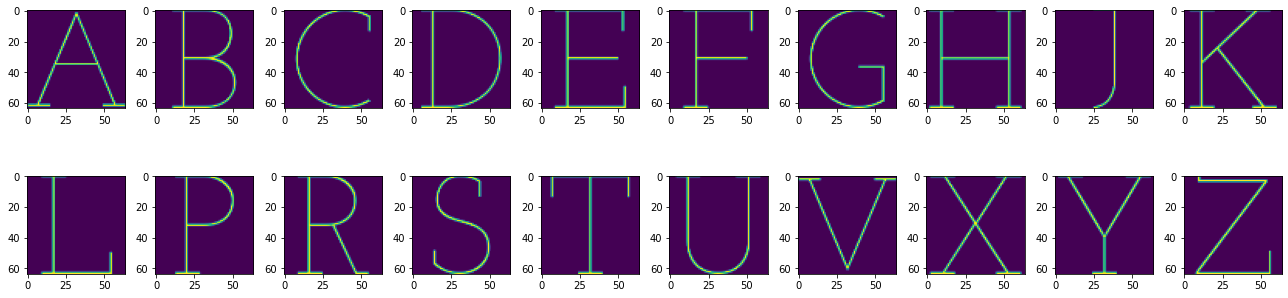

2


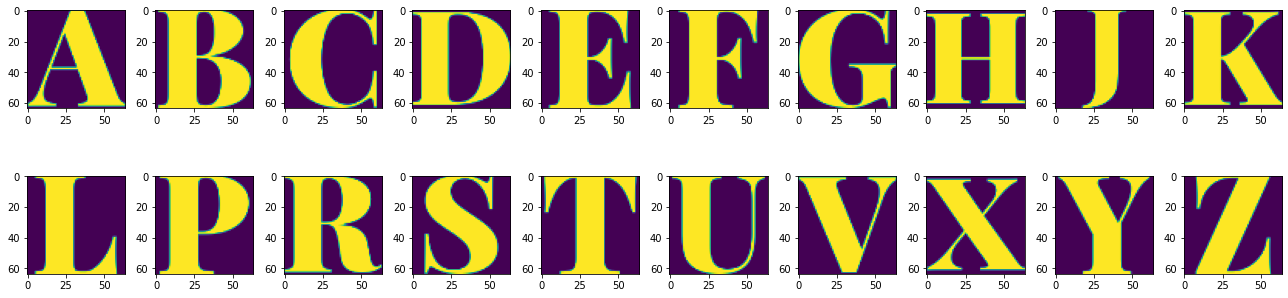

2


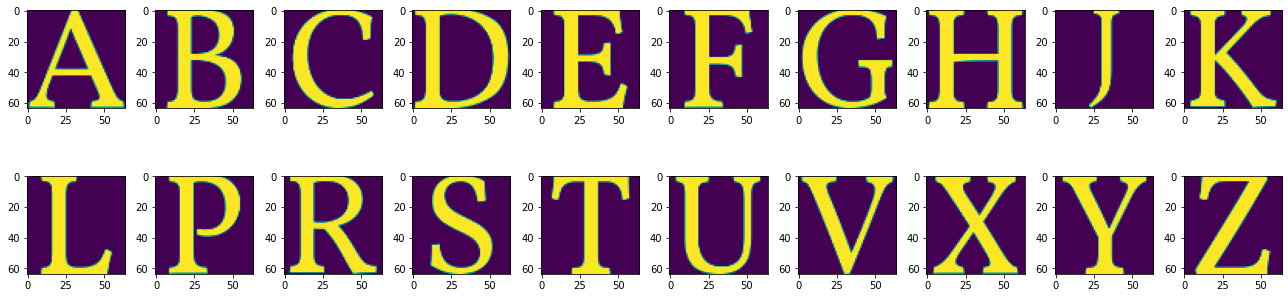

In [69]:
# parse Google Font repo
google_fonts_path = '../dataset/fonts/ofl/'
gf_metadata = parse_gf_metadata(google_fonts_path)

# render some random fonts
for font_path in np.random.choice(gf_metadata[gf_metadata.category=='SERIF'].path, 5):
    visualize_set_of_chars(font_path, char_set, 64)

In [92]:
gf_metadata[gf_metadata.weight==100].index

# gf_metadata = gf_metadata.drop(index=ind)

Int64Index([   0,   90,   91,  155,  202,  203,  236,  309,  328,  400,  401,
             450,  451,  478,  506,  507,  605,  663,  664,  762,  763,  779,
             780,  838,  839,  855,  905,  916, 1018, 1019, 1038, 1109, 1110,
            1131, 1132, 1211, 1286, 1287, 1431, 1440, 1457, 1458, 1575, 1576,
            1714, 1715, 1824, 1825, 1858, 1859, 1949, 1973, 1974, 1994, 1995,
            2028, 2035, 2036, 2064, 2078, 2135, 2136, 2180, 2194, 2195, 2215,
            2220, 2221, 2273, 2274, 2293, 2354, 2355, 2382, 2383, 2424, 2425,
            2448, 2520, 2528, 2536, 2537, 2580, 2581],
           dtype='int64')

In [101]:
np.where((gf_metadata.weight==900) + (gf_metadata.weight==100))

(array([   3,   19,   59,  106,  107,  128,  129,  163,  180,  181,  218,
         219,  336,  412,  413,  434,  466,  467,  486,  546,  547,  579,
         587,  591,  613,  619,  650,  651,  679,  680,  695,  795,  796,
         852,  853,  863,  913,  924, 1034, 1035, 1046, 1090, 1091, 1104,
        1147, 1148, 1205, 1206, 1216, 1302, 1303, 1342, 1343, 1363, 1438,
        1448, 1492, 1493, 1512, 1541, 1542, 1591, 1592, 1599, 1629, 1630,
        1638, 1681, 1682, 1787, 1814, 1844, 1845, 1874, 1875, 1957, 1989,
        1990, 2006, 2007, 2072, 2085, 2187, 2210, 2211, 2236, 2237, 2246,
        2247, 2249, 2266, 2287, 2288, 2300, 2339, 2340, 2370, 2371, 2398,
        2399, 2440, 2441, 2456, 2468, 2485, 2498, 2515, 2516, 2534, 2552,
        2553, 2596, 2597, 2612]),)

In [112]:
indeces = np.where((gf_metadata.weight==900) | (gf_metadata.weight==100))[0].tolist()
print(len(gf_metadata))
gf_metadata.drop(index=indeces)
print(len(gf_metadata))

2690
2690


In [85]:
c = False
a = np.array([False, False, True])
b = np.array([True, False, True])
c += a+b
np.where(c)[0]

array([0, 2])

In [117]:
for i, row in gf_metadata.iterrows():
    conditions = ('latin' in row.subsets) and (row.style == 'normal')
    if 'Rubik' in str(row.name):
        print(row)
#         print(row.style)
# visualize_set_of_chars('../dataset/fonts/ofl/kumarone/KumarOne-Regular.ttf', '1234', 64)

# Explore Google Fonts set

In [52]:
unique_categories = gf_metadata.category.unique()
print('Presented Font categories:')
print(unique_categories,'\n')
print('Total number of fonts')
print(len(gf_metadata),'\n')
for cat in unique_categories:
    fracture = len(gf_metadata[gf_metadata.category==cat]) / len(gf_metadata)
    print(f'{100*fracture:.2f}% of them are {cat}')
print('including various styles')

Presented Font categories:
['DISPLAY' 'SERIF' 'HANDWRITING' 'SANS_SERIF' 'MONOSPACE' 'Monospace'] 

Total number of fonts
2753 

18.27% of them are DISPLAY
23.28% of them are SERIF
6.43% of them are HANDWRITING
49.33% of them are SANS_SERIF
2.65% of them are MONOSPACE
0.04% of them are Monospace
including various styles


In [91]:
gf_metadata.iloc[0]

name                                           Londrina Solid
path        ../dataset/fonts/ofl/londrinasolid/LondrinaSol...
category                                              DISPLAY
style                                                  normal
weight                                                    100
subsets                                         [latin, menu]
Name: 0, dtype: object

In [51]:
from freetype import *
from PIL import Image
face = Face('../dataset/fonts/ofl/kumarone/KumarOne-Regular.ttf')
# face = Face('../dataset/fonts/ofl/londrinasolid/LondrinaSolid-Thin.ttf')
face.set_pixel_sizes(64,64)
face.load_char(':')

bitmap = face.glyph.bitmap
img = np.array(bitmap.buffer).reshape(bitmap.rows,-1)
plt.imshow(img)

FT_Exception: FT_Exception:  (execution context too long)

In [29]:
char_set = []
print ('Family name:         {}'.format(face.family_name))
print ('Style name:          {}'.format(face.style_name))
print ('Charmaps:            {}'.format([charmap.encoding_name for charmap in face.charmaps]))
print ('')
print ('Face number:         {}'.format(face.num_faces))
print ('Glyph number:        {}'.format(face.num_glyphs))
print ('Available sizes:     {}'.format(face.available_sizes))
print ('')
print ('units per em:        {}'.format(face.units_per_EM))
print ('ascender:            {}'.format(face.ascender))
print ('descender:           {}'.format(face.descender))
print ('height:              {}'.format(face.height))
print ('')
print ('max_advance_width:   {}'.format(face.max_advance_width))
print ('max_advance_height:  {}'.format(face.max_advance_height))
print ('')
print ('underline_position:  {}'.format(face.underline_position))
print ('underline_thickness: {}'.format(face.underline_thickness))
print ('')
print ('Has horizontal:      {}'.format(face.has_horizontal))
print ('Has vertical:        {}'.format(face.has_vertical))
print ('Has kerning:         {}'.format(face.has_kerning))
print ('Is fixed width:      {}'.format(face.is_fixed_width))
print ('Is scalable:         {}'.format(face.is_scalable))
print ('')

Family name:         b'Kumar One'
Style name:          b'Regular'
Charmaps:            ['FT_ENCODING_UNICODE', 'FT_ENCODING_APPLE_ROMAN', 'FT_ENCODING_UNICODE']

Face number:         1
Glyph number:        868
Available sizes:     []

units per em:        1000
ascender:            1137
descender:           -642
height:              1779

max_advance_width:   2302
max_advance_height:  1779

underline_position:  -100
underline_thickness: 50

Has horizontal:      True
Has vertical:        False
Has kerning:         False
Is fixed width:      False
Is scalable:         True

